<a href="https://colab.research.google.com/github/DerAndr/classical_ml_course/blob/main/examples/%5BDataPreparation%5D_MissingValuesAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Missing Data & Wealth Analytics Example

**Dataset:** [Original Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic/data)  
**LinkedIn:** [Andrey Holz](https://www.linkedin.com/in/andrey-holz)  
**Copyright © 2025 Andrey Holz. All rights reserved.**

---

This notebook demonstrates advanced missing data analysis and visualizations, revealing relationships between cabin availability, passenger class, gender, age, and fare.

**Designed for Google Colab.**

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Set aesthetic parameters for clarity and publication-quality visuals
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

# Step 1: Load Titanic Dataset

The dataset used in this project is the original Titanic dataset from Kaggle.

Download it from: [Kaggle Titanic Competition](https://www.kaggle.com/c/titanic/data)

Ensure the file "titanic.csv" is uploaded to your Colab environment.

In [3]:
# Load dataset from local file
titanic = pd.read_csv('titanic.csv')
print("Initial Missing Values per Column:")
print(titanic.isnull().sum())

Initial Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Step 2: Visualize Overall Missing Data

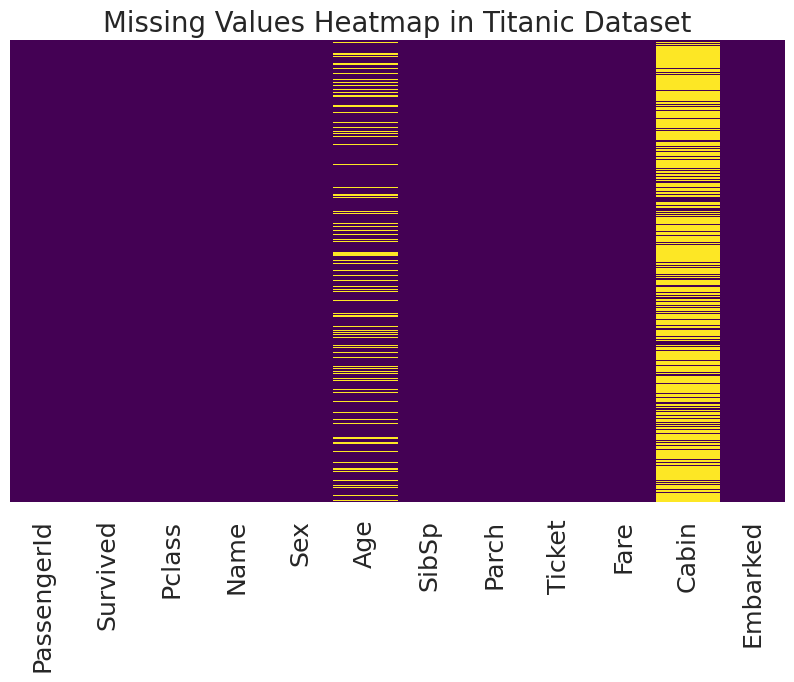

In [4]:
# A heatmap shows where missing values occur in the dataset.
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap in Titanic Dataset")
plt.show()

# Step 3: Feature Engineering for Cabin and Age Imputation

* **Cabin Availability:** Create a binary feature 'has_cabin': 1 if cabin info is present, 0 if missing.
* **Age Imputation:** Impute missing ages using two strategies:
    1. Overall median imputation.
    2. Group-wise median imputation (by Sex and Pclass).

In [5]:
# Create 'has_cabin' binary feature
titanic['has_cabin'] = titanic['Cabin'].notnull().astype(int)

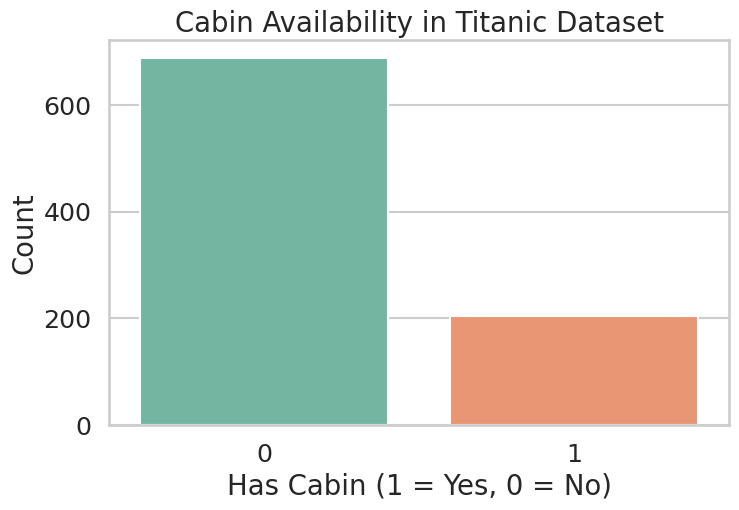

In [6]:
# Visualize cabin availability counts
plt.figure(figsize=(8, 5))
sns.countplot(x='has_cabin', hue='has_cabin', legend=False, data=titanic, palette="Set2")
plt.title("Cabin Availability in Titanic Dataset")
plt.xlabel("Has Cabin (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

In [7]:
print("Percentage of passengers with missing Cabin:",
      round(100 * titanic['Cabin'].isnull().mean(), 2), "%")

Percentage of passengers with missing Cabin: 77.1 %


## Method 1: Simple median imputation for Age

In [8]:
titanic_median = titanic.copy()
titanic_median['age_imputed'] = titanic_median['Age'].fillna(titanic_median['Age'].median())

## Method 2: Group-wise median imputation (by Sex and Pclass)

In [9]:
titanic_group = titanic.copy()
titanic_group['age_imputed'] = titanic_group.groupby(['Sex', 'Pclass'])['Age']\
                                           .transform(lambda x: x.fillna(x.median()))

# Step 4: Compare Age Distributions by Imputation Strategy
We compare the density of original Age (non-missing), simple median-imputed Age, and group-wise imputed Age.


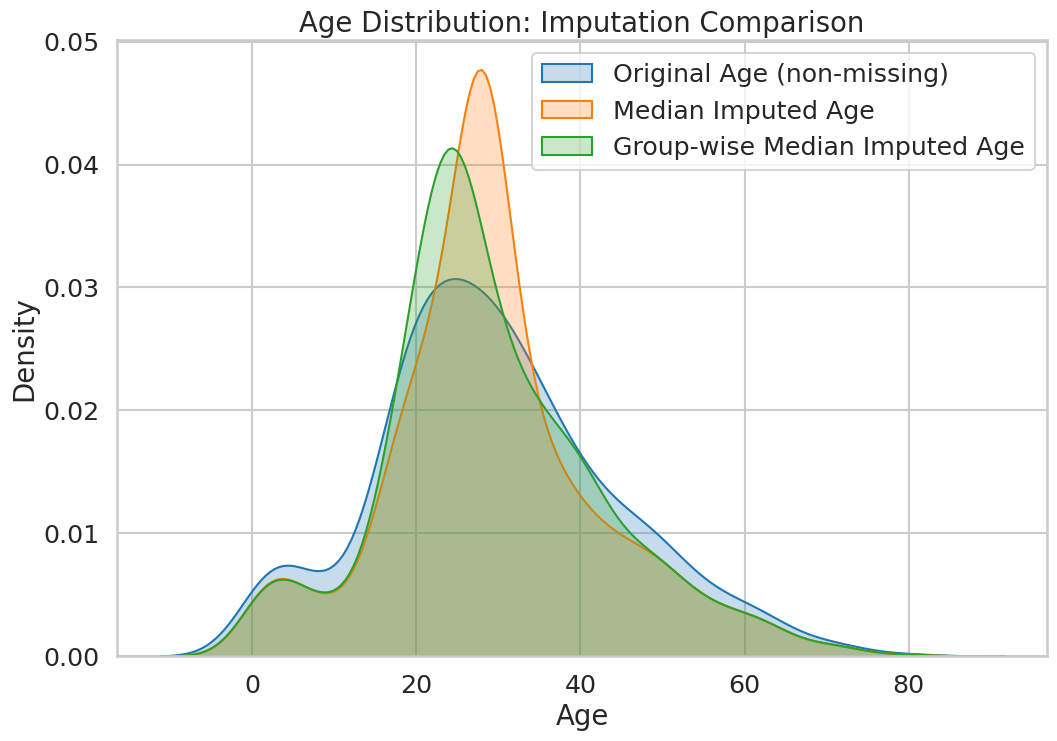

In [18]:
plt.figure(figsize=(12, 8))
sns.kdeplot(titanic['Age'].dropna(), label='Original Age (non-missing)', fill=True)
sns.kdeplot(titanic_median['age_imputed'], label='Median Imputed Age', fill=True)
sns.kdeplot(titanic_group['age_imputed'], label='Group-wise Median Imputed Age', fill=True)
plt.title("Age Distribution: Imputation Comparison")
plt.xlabel("Age")
plt.legend()
plt.show()

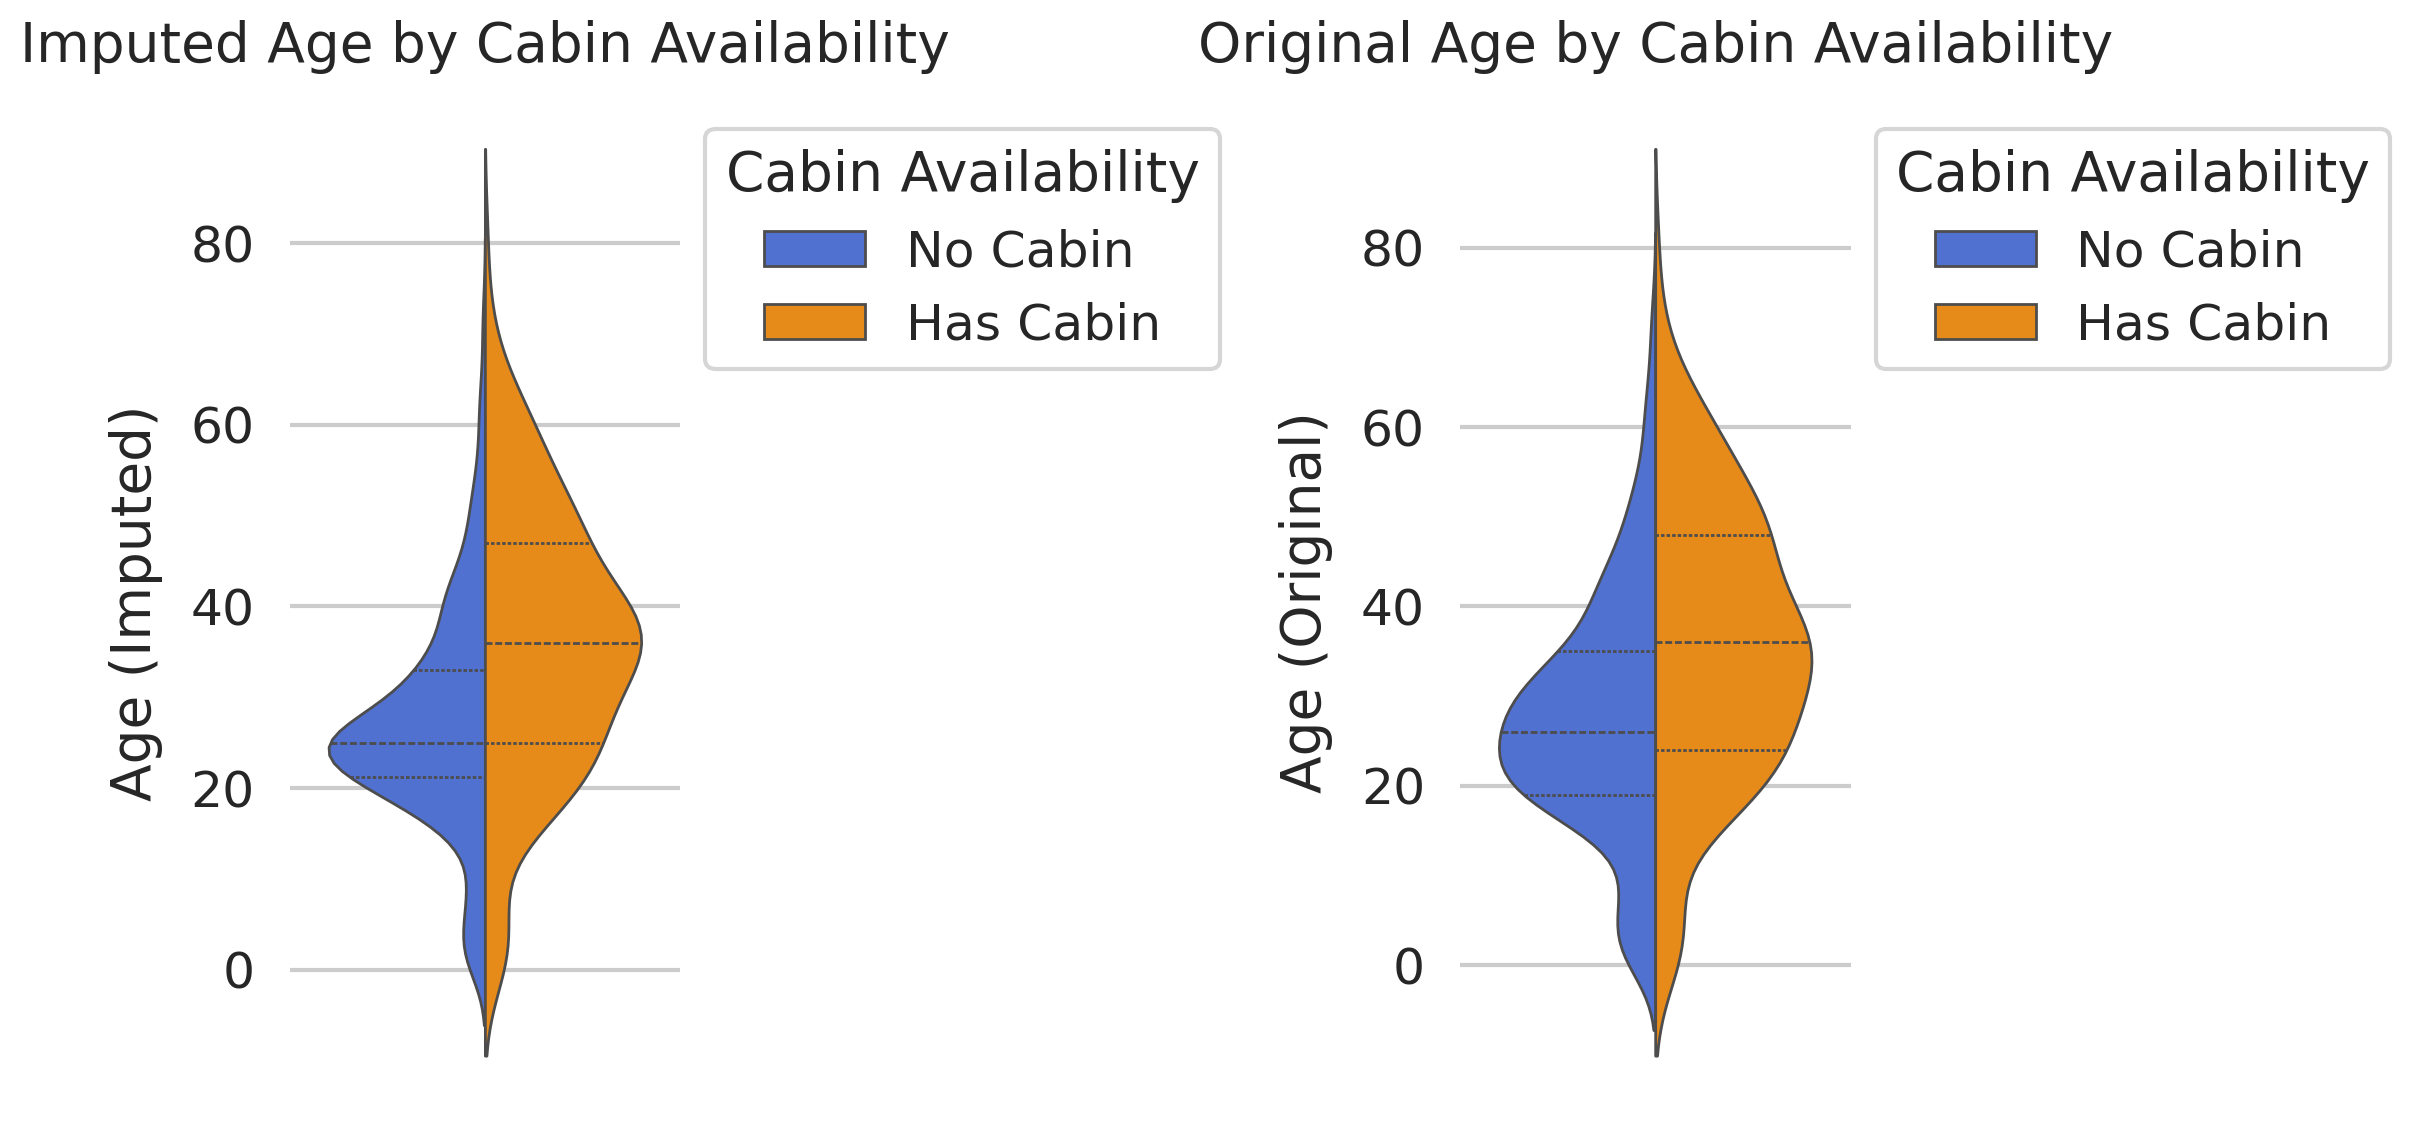

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the titanic DataFrame is loaded and has been processed as in previous steps
# 'titanic_group' contains the group-wise imputed age in column 'age_imputed' and binary 'has_cabin'
# Also, the original Titanic data (titanic) contains the raw 'Age' values.

# Create a dummy column for a single x-category in both dataframes
titanic_group['dummy_x'] = 'All'
df_nonnull = titanic[titanic['Age'].notnull()].copy()
df_nonnull['dummy_x'] = 'All'

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=200)

# Plot 1: Merged Violin Plot for Imputed Age
sns.violinplot(
    x='dummy_x',
    y='age_imputed',
    hue='has_cabin',
    data=titanic_group,
    split=True,            # merge left & right distributions
    inner='quartile',      # display quartiles inside the violin
    linewidth=1,
    palette=['royalblue', 'darkorange'],  # royalblue for No Cabin, darkorange for Has Cabin
    saturation=0.8,
    ax=axes[0]
)
axes[0].set_xlabel("")
axes[0].set_xticks([])
axes[0].set_ylabel("Age (Imputed)", labelpad=10)
axes[0].set_title("Imputed Age by Cabin Availability", pad=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ["No Cabin", "Has Cabin"], title="Cabin Availability", loc="upper left", bbox_to_anchor=(1, 1))
sns.despine(ax=axes[0], left=True, bottom=True)

# Plot 2: Merged Violin Plot for Original Age (non-missing)
sns.violinplot(
    x='dummy_x',
    y='Age',
    hue='has_cabin',
    data=df_nonnull,
    split=True,
    inner='quartile',
    linewidth=1,
    palette=['royalblue', 'darkorange'],  # royalblue for No Cabin, darkorange for Has Cabin
    saturation=0.8,
    ax=axes[1]
)
axes[1].set_xlabel("")
axes[1].set_xticks([])
axes[1].set_ylabel("Age (Original)", labelpad=10)
axes[1].set_title("Original Age by Cabin Availability", pad=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ["No Cabin", "Has Cabin"], title="Cabin Availability", loc="upper left", bbox_to_anchor=(1, 1))
sns.despine(ax=axes[1], left=True, bottom=True)

plt.tight_layout()
plt.show()


=== Imputed Age Quartiles by Cabin Availability ===
has_cabin=0 -> Q1: 21.25, Median: 25.00, Q3: 33.00
has_cabin=1 -> Q1: 25.00, Median: 36.00, Q3: 47.00

=== Original Age Quartiles by Cabin Availability ===
has_cabin=0 -> Q1: 19.00, Median: 26.00, Q3: 35.00
has_cabin=1 -> Q1: 24.00, Median: 36.00, Q3: 48.00


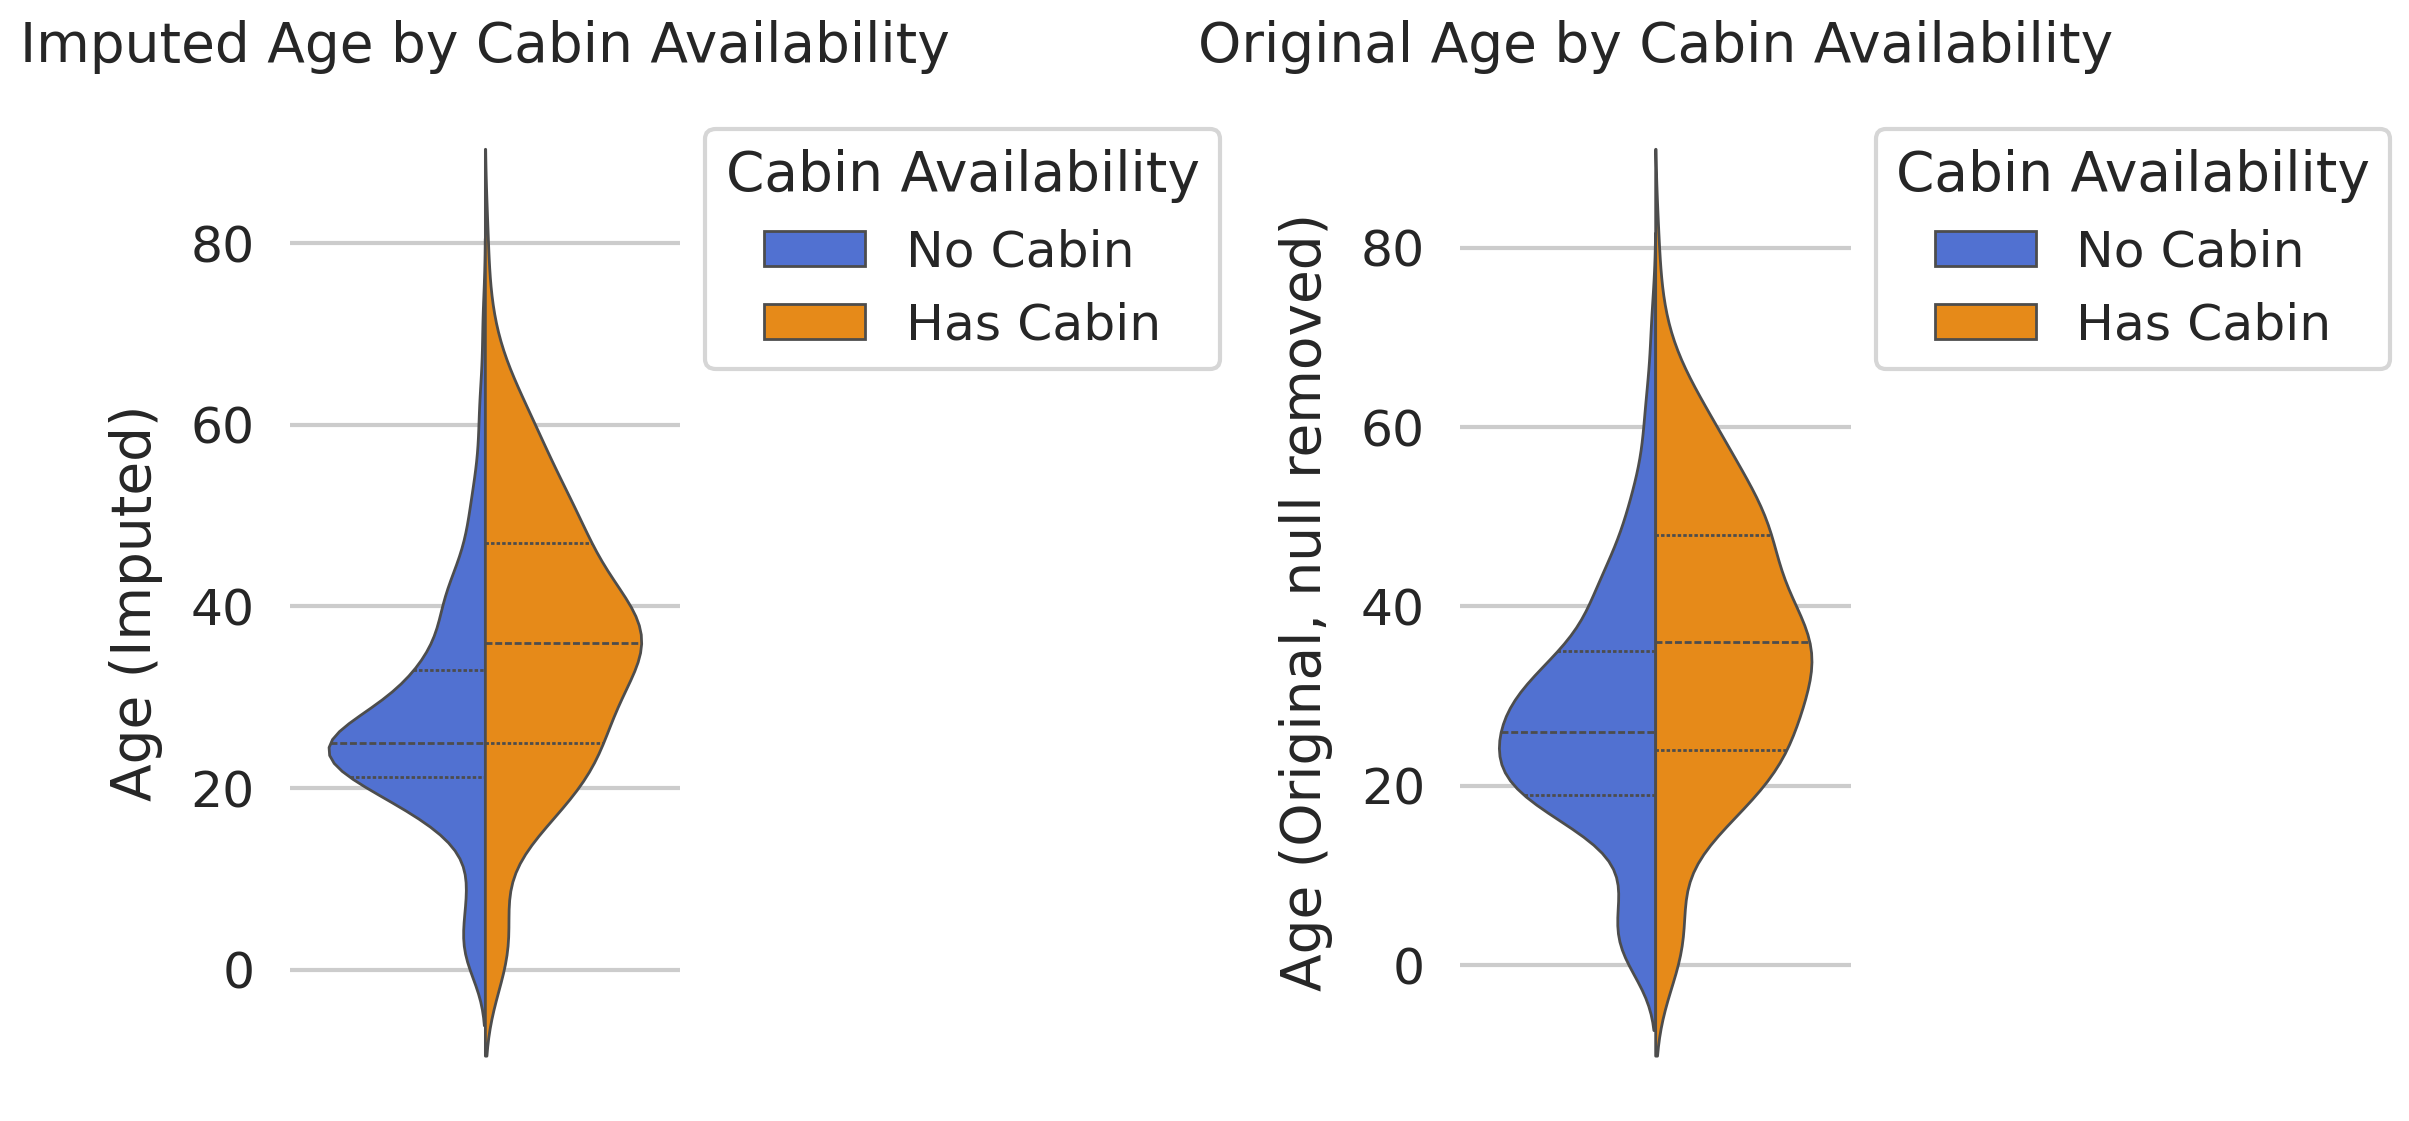

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the titanic DataFrame is loaded and has been processed as in previous steps
# 'titanic_group' contains the group-wise imputed age in column 'age_imputed' and binary 'has_cabin'
# Also, the original Titanic data (titanic) contains the raw 'Age' values.

# Create a dummy column for a single x-category in both dataframes
titanic_group['dummy_x'] = 'All'
df_nonnull = titanic[titanic['Age'].notnull()].copy()
df_nonnull['dummy_x'] = 'All'

# ------------------ PRINT QUARTILES SECTION ------------------
print("=== Imputed Age Quartiles by Cabin Availability ===")
for cabin_label, group_data in titanic_group.groupby('has_cabin'):
    q1 = group_data['age_imputed'].quantile(0.25)
    median = group_data['age_imputed'].quantile(0.50)
    q3 = group_data['age_imputed'].quantile(0.75)
    print(f"has_cabin={cabin_label} -> Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}")

print("\n=== Original Age Quartiles by Cabin Availability ===")
for cabin_label, group_data in df_nonnull.groupby('has_cabin'):
    q1 = group_data['Age'].quantile(0.25)
    median = group_data['Age'].quantile(0.50)
    q3 = group_data['Age'].quantile(0.75)
    print(f"has_cabin={cabin_label} -> Q1: {q1:.2f}, Median: {median:.2f}, Q3: {q3:.2f}")
# -------------------------------------------------------------

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=200)

# Plot 1: Merged Violin Plot for Imputed Age
sns.violinplot(
    x='dummy_x',
    y='age_imputed',
    hue='has_cabin',
    data=titanic_group,
    split=True,            # merge left & right distributions
    inner='quartile',      # display quartiles inside the violin
    linewidth=1,
    palette=['royalblue', 'darkorange'],  # royalblue for No Cabin, darkorange for Has Cabin
    saturation=0.8,
    ax=axes[0]
)
axes[0].set_xlabel("")
axes[0].set_xticks([])
axes[0].set_ylabel("Age (Imputed)", labelpad=10)
axes[0].set_title("Imputed Age by Cabin Availability", pad=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ["No Cabin", "Has Cabin"], title="Cabin Availability", loc="upper left", bbox_to_anchor=(1, 1))
sns.despine(ax=axes[0], left=True, bottom=True)

# Plot 2: Merged Violin Plot for Original Age (non-missing)
sns.violinplot(
    x='dummy_x',
    y='Age',
    hue='has_cabin',
    data=df_nonnull,
    split=True,
    inner='quartile',
    linewidth=1,
    palette=['royalblue', 'darkorange'],  # royalblue for No Cabin, darkorange for Has Cabin
    saturation=0.8,
    ax=axes[1]
)
axes[1].set_xlabel("")
axes[1].set_xticks([])
axes[1].set_ylabel("Age (Original, null removed)", labelpad=10)
axes[1].set_title("Original Age by Cabin Availability", pad=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ["No Cabin", "Has Cabin"], title="Cabin Availability", loc="upper left", bbox_to_anchor=(1, 1))
sns.despine(ax=axes[1], left=True, bottom=True)

plt.tight_layout()
plt.show()


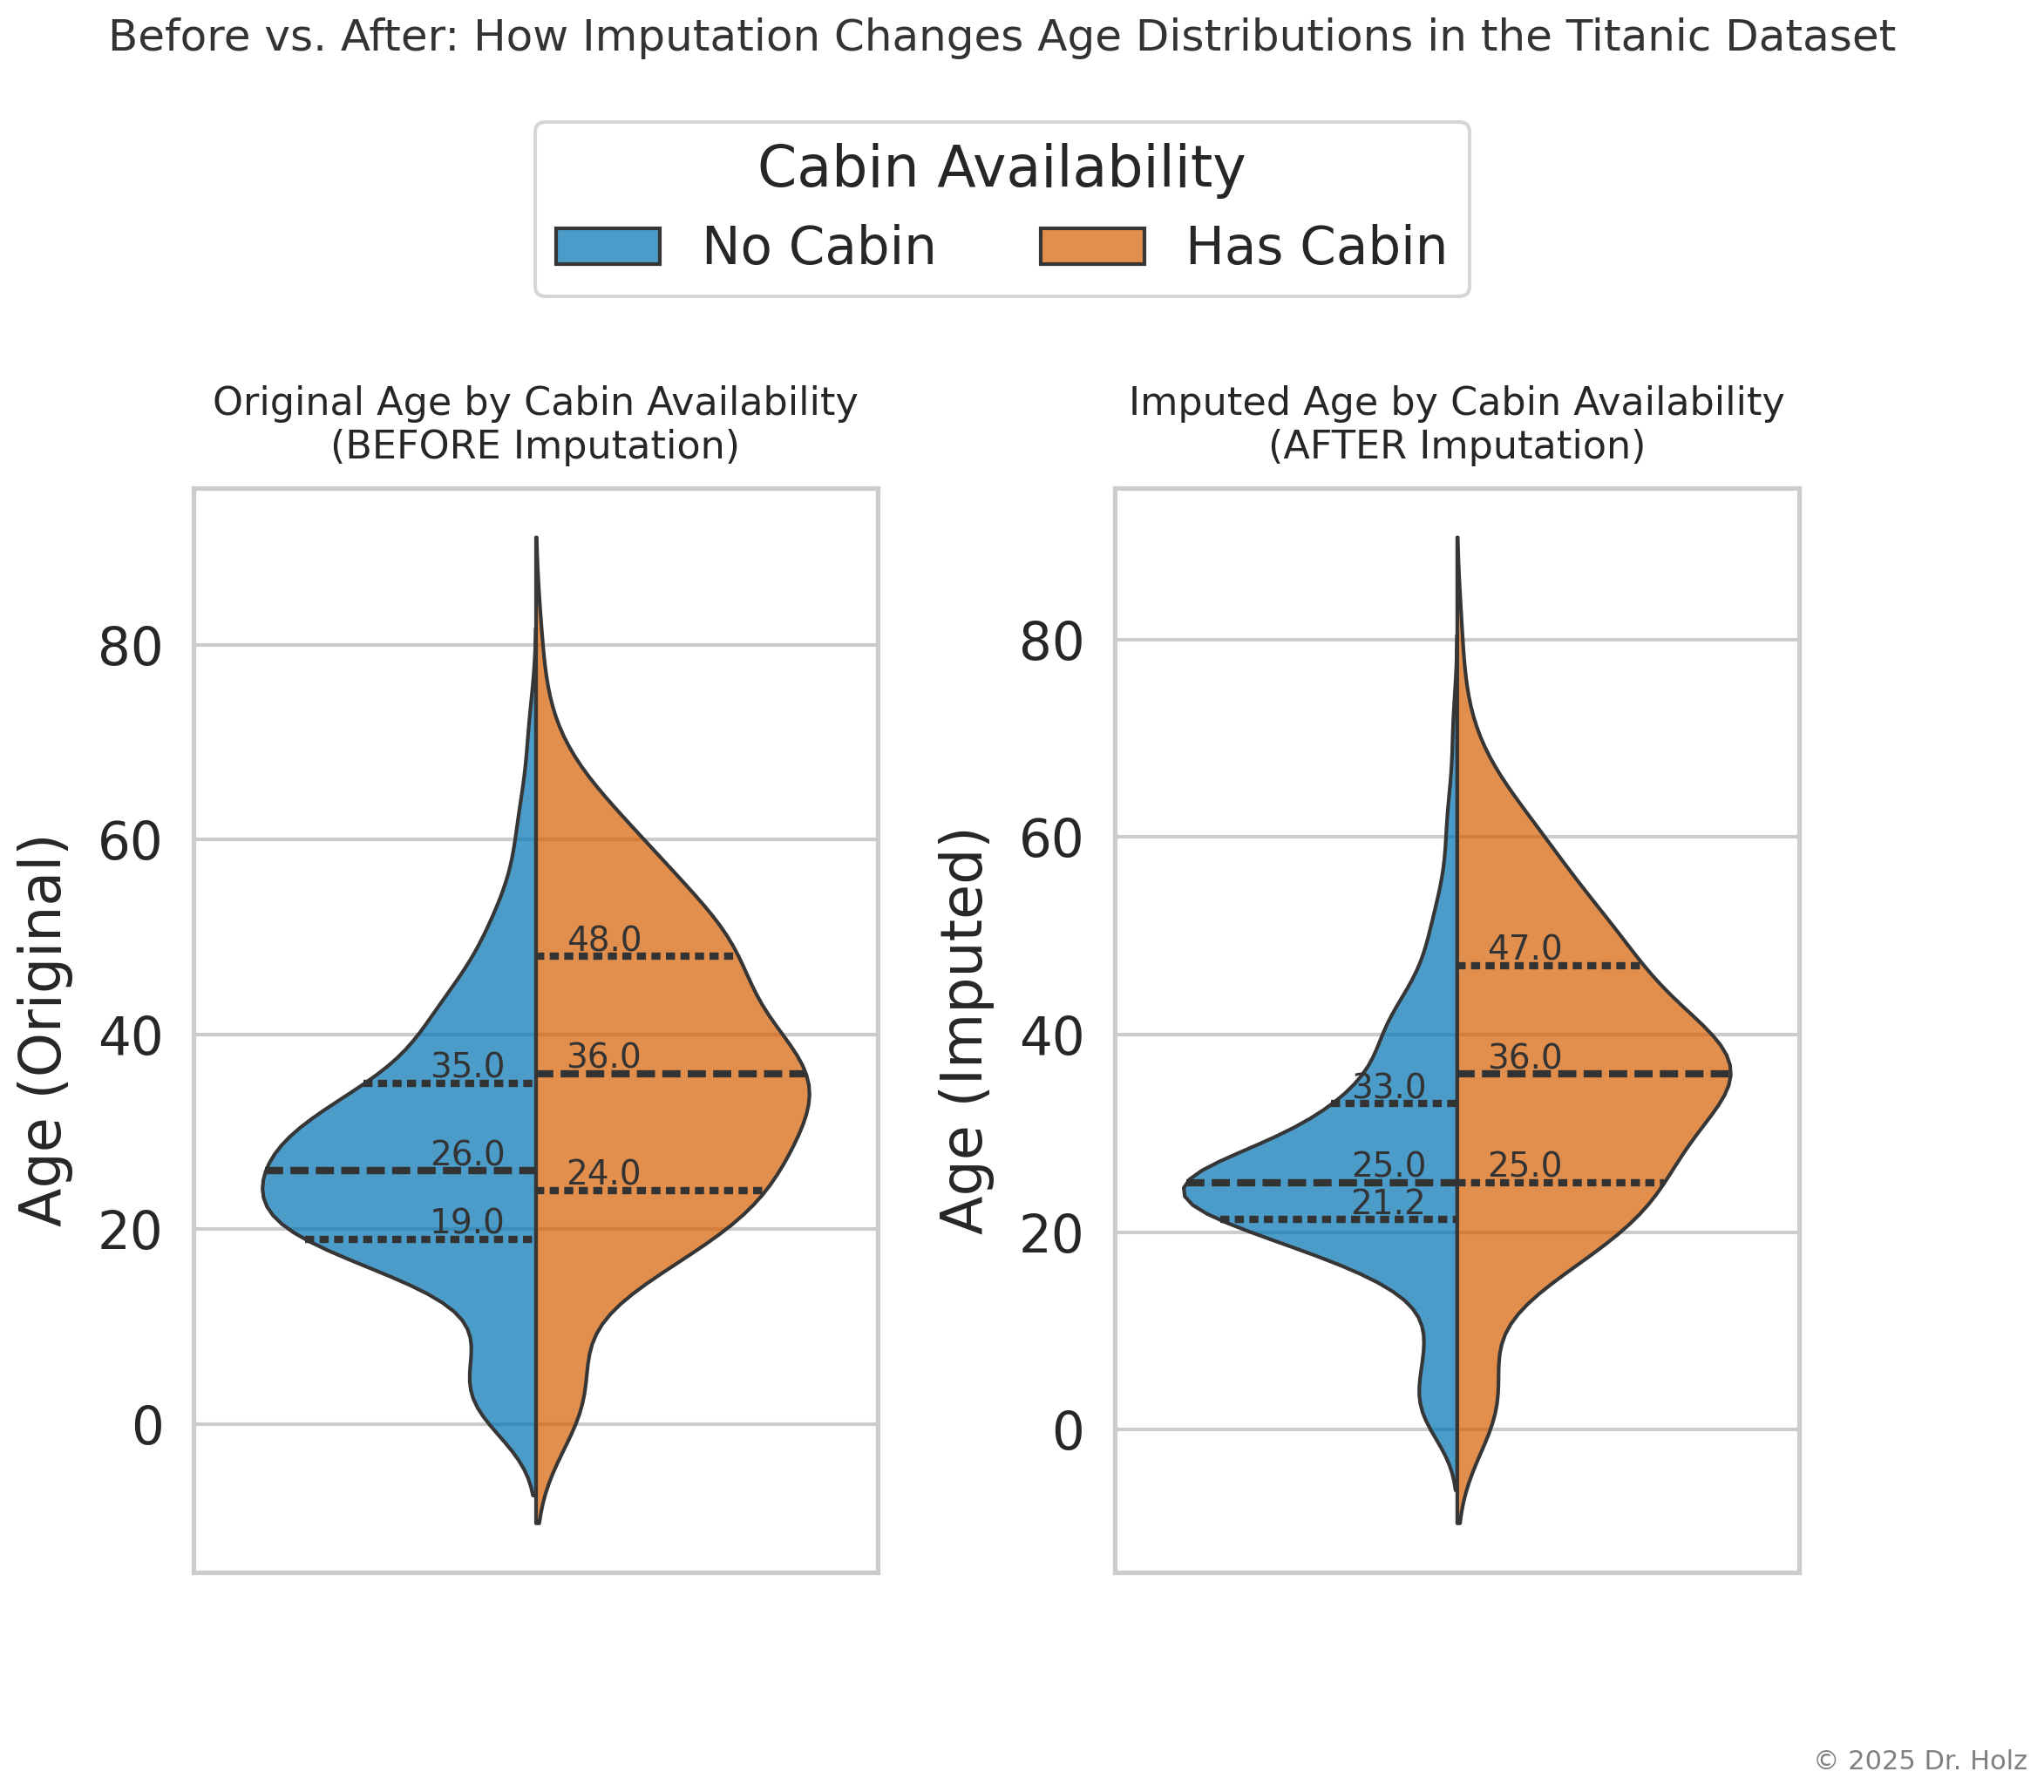

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------------------------------------------
# 1. General Setup
# -----------------------------------------------------------------
sns.set_context("talk", font_scale=1.3)   # Larger base font size
sns.set_style("whitegrid")               # White grid style

# Color-blind friendly palette with alpha (transparency)
palette_with_alpha = [
    (0.0, 0.45, 0.70, 0.7),  # RGBA for "No Cabin" (blue-ish)
    (0.84, 0.37, 0.0, 0.7)   # RGBA for "Has Cabin" (orange-ish)
]

# Create the figure with a white background
fig, axes = plt.subplots(1, 2, figsize=(12, 9), dpi=200)
fig.patch.set_facecolor('white')

# -----------------------------------------------------------------
# 2. Left Plot: Original Age (BEFORE)
# -----------------------------------------------------------------
sns.violinplot(
    x='dummy_x',
    y='Age',
    hue='has_cabin',
    data=df_nonnull,  # DataFrame with non-missing Age
    split=True,
    inner='quartile',
    linewidth=1.5,
    palette=palette_with_alpha,
    saturation=1.0,   # Keep saturation at 1.0 since we already used alpha in RGBA
    ax=axes[0]
)
axes[0].set_title("Original Age by Cabin Availability\n(BEFORE Imputation)", fontsize=16, pad=12)
axes[0].set_ylabel("Age (Original)", labelpad=10)
axes[0].set_xlabel("")
axes[0].set_xticks([])

# -----------------------------------------------------------------
# 3. Right Plot: Imputed Age (AFTER)
# -----------------------------------------------------------------
sns.violinplot(
    x='dummy_x',
    y='age_imputed',
    hue='has_cabin',
    data=titanic_group,  # DataFrame with imputed Age
    split=True,
    inner='quartile',
    linewidth=1.5,
    palette=palette_with_alpha,
    saturation=1.0,
    ax=axes[1]
)
axes[1].set_title("Imputed Age by Cabin Availability\n(AFTER Imputation)", fontsize=16, pad=12)
axes[1].set_ylabel("Age (Imputed)", labelpad=10)
axes[1].set_xlabel("")
axes[1].set_xticks([])

# -----------------------------------------------------------------
# 4. Emphasize Quartile Lines & Annotations
# -----------------------------------------------------------------
quartile_fontsize = 14  # Increase font size for visibility

# LEFT PLOT: Original Age quartiles
for line in axes[0].lines:
    line.set_linewidth(3.0)      # Thicker quartile lines
    line.set_color('#333333')    # Dark gray for better contrast

for has_cabin_val, subset in df_nonnull.groupby('has_cabin'):
    q1 = subset['Age'].quantile(0.25)
    med = subset['Age'].quantile(0.50)
    q3 = subset['Age'].quantile(0.75)
    offset = -0.1 if has_cabin_val == 0 else 0.1
    vert_offset = 1.5
    axes[0].text(
        offset, med+vert_offset,
        f"{med:.1f}",
        color='#333333',
        fontsize=quartile_fontsize,
        ha='center', va='center'
    )
    axes[0].text(
        offset, q1+vert_offset,
        f"{q1:.1f}",
        color='#333333',
        fontsize=quartile_fontsize,
        ha='center', va='center'
    )
    axes[0].text(
        offset, q3+vert_offset,
        f"{q3:.1f}",
        color='#333333',
        fontsize=quartile_fontsize,
        ha='center', va='center'
    )

# RIGHT PLOT: Imputed Age quartiles
for line in axes[1].lines:
    line.set_linewidth(3.0)
    line.set_color('#333333')

for has_cabin_val, subset in titanic_group.groupby('has_cabin'):
    q1 = subset['age_imputed'].quantile(0.25)
    med = subset['age_imputed'].quantile(0.50)
    q3 = subset['age_imputed'].quantile(0.75)
    offset = -0.1 if has_cabin_val == 0 else 0.1
    vert_offset = 1.5
    axes[1].text(
        offset, med+vert_offset,
        f"{med:.1f}",
        color='#333333',
        fontsize=quartile_fontsize,
        ha='center', va='center'
    )
    axes[1].text(
        offset, q1+vert_offset,
        f"{q1:.1f}",
        color='#333333',
        fontsize=quartile_fontsize,
        ha='center', va='center'
    )
    axes[1].text(
        offset, q3+vert_offset,
        f"{q3:.1f}",
        color='#333333',
        fontsize=quartile_fontsize,
        ha='center', va='center'
    )

# -----------------------------------------------------------------
# 5. Create a Single Legend & Final Touches
# -----------------------------------------------------------------
axes[0].legend_.remove()
axes[1].legend_.remove()
handles, labels = axes[0].get_legend_handles_labels()

legend = fig.legend(
    handles,
    ["No Cabin", "Has Cabin"],
    title="Cabin Availability",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.08),
    ncol=2
)
legend.set_title("Cabin Availability")

plt.suptitle(
    "Before vs. After: How Imputation Changes Age Distributions in the Titanic Dataset",
    fontsize=18,
    y=1.13,
    color='#333333'
)

plt.text(
    0.99, 0.01,
    "© 2025 Dr. Holz",
    ha='right',
    va='bottom',
    color='gray',
    transform=fig.transFigure,
    fontsize=11
)

plt.tight_layout()
plt.show()


# Step 5: Explore Age Distribution by Cabin Availability

We now analyze how the imputed age differs between passengers with and without cabin info.

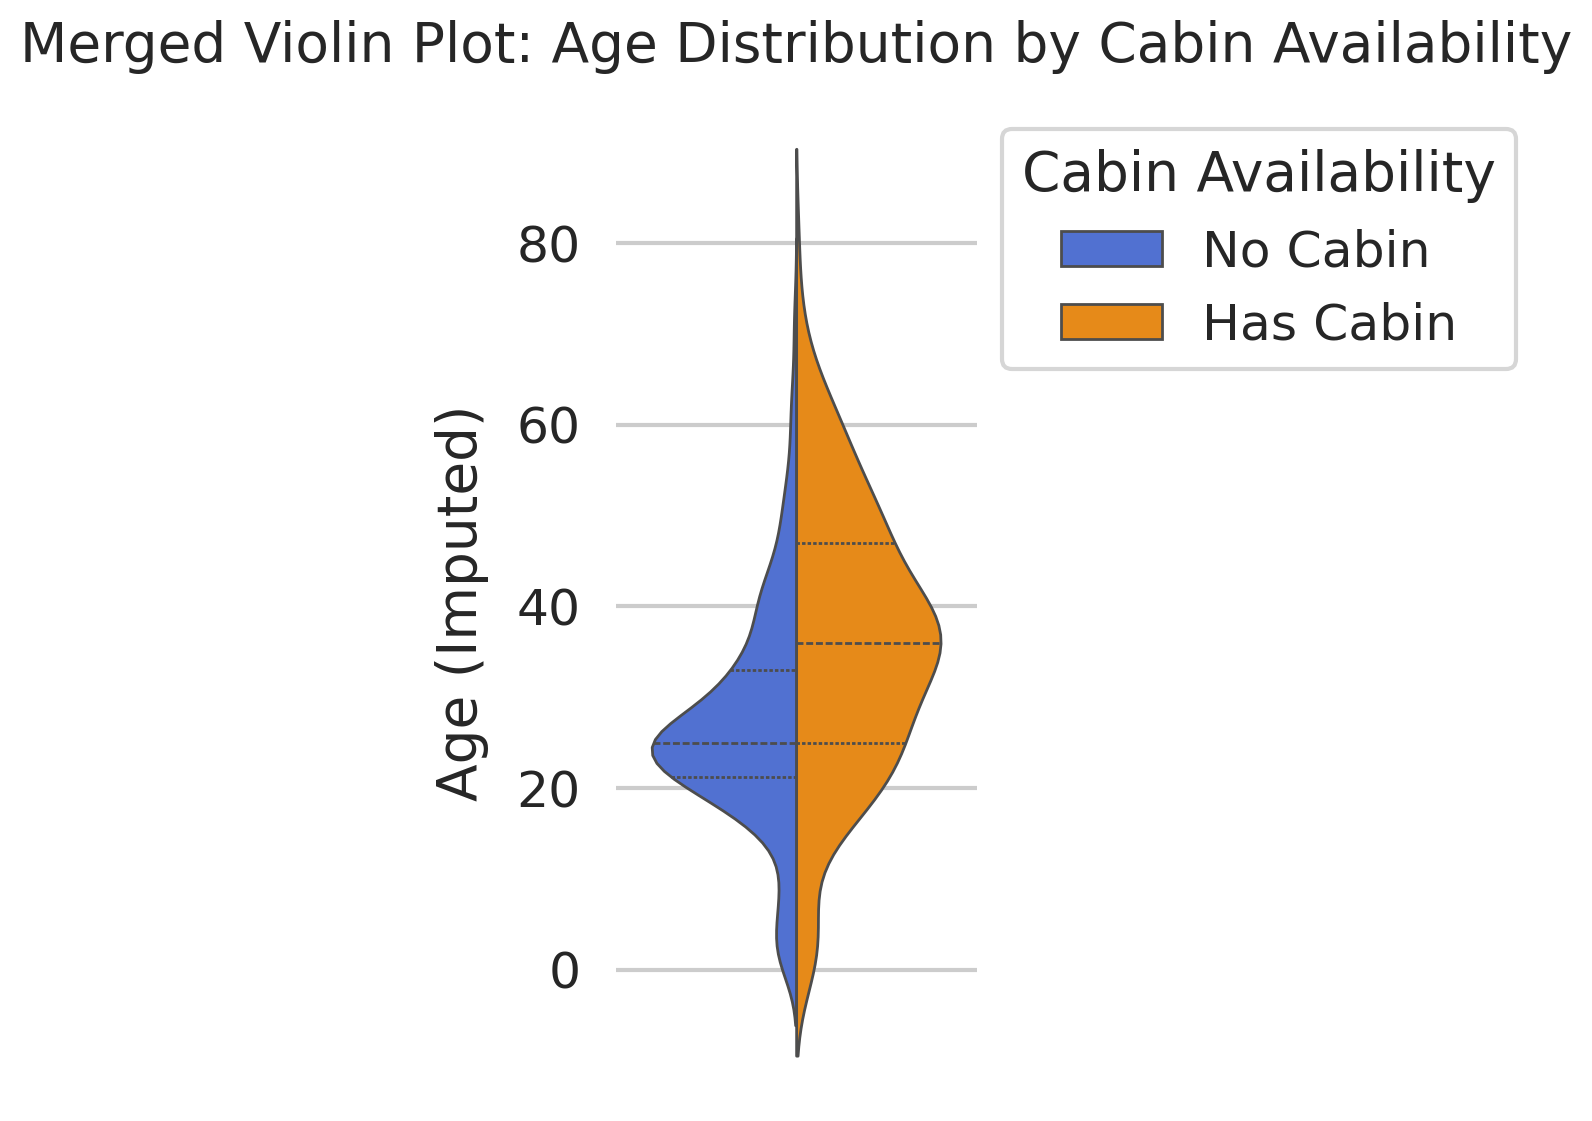

In [25]:
# Create a merged (split) violin plot for a single, combined distribution.

# Create a dummy column so we have one x-category
titanic_group['dummy_x'] = 'All'

plt.figure(figsize=(6, 6), dpi=200)
sns.violinplot(
    x='dummy_x',
    y='age_imputed',
    hue='has_cabin',
    data=titanic_group,
    split=True,            # merge left & right distributions
    inner='quartile',      # show quartile lines inside the violin
    linewidth=1,
    palette=['royalblue', 'darkorange'],  # royalblue for No Cabin, darkorange for Has Cabin
    saturation=0.8
)
plt.xlabel("")
plt.xticks([])
plt.ylabel("Age (Imputed)", labelpad=10)
plt.title("Merged Violin Plot: Age Distribution by Cabin Availability", pad=15)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["No Cabin", "Has Cabin"], title="Cabin Availability", loc="upper left", bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


# Step 6: Advanced Analytics: Passenger Class, Gender, and Wealth Insights

Here, we analyze how wealth (proxied by Fare) is linked to Passenger Class, Cabin Availability, and Gender.


In [12]:
from scipy import stats

# Calculate the point-biserial correlation between 'has_cabin' (binary: 0 or 1)
# and 'Fare' (continuous)
pb_corr, p_value = stats.pointbiserialr(titanic['has_cabin'], titanic['Fare'])

# Print the correlation and p-value with formatted output
print(f"Point-biserial Correlation between 'has_cabin' and 'Fare': {pb_corr:.3f}")
print(f"P-value: {p_value:.3e}")

# Determine correlation strength level
if abs(pb_corr) < 0.3:
    strength = "weak"
elif abs(pb_corr) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

# Dynamic interpretation based on p-value and correlation level
if p_value < 0.05:
    significance = "statistically significant"
    interpretation = (f"The correlation of {pb_corr:.3f} indicates a {strength} positive association "
                      f"between having cabin information and fare. This relationship is {significance}, "
                      "suggesting that passengers with cabin data tend to pay higher fares.")
else:
    significance = "not statistically significant"
    interpretation = (f"The correlation of {pb_corr:.3f} indicates a {strength} association "
                      f"between having cabin information and fare, but this relationship is {significance}.")

print("\n" + interpretation)

Point-biserial Correlation between 'has_cabin' and 'Fare': 0.482
P-value: 4.853e-53

The correlation of 0.482 indicates a moderate positive association between having cabin information and fare. This relationship is statistically significant, suggesting that passengers with cabin data tend to pay higher fares.


Contingency Table:
has_cabin    0    1
Pclass             
1           40  176
2          168   16
3          479   12

Chi-Square Test Results:
Chi2 Statistic: 557.310
Degrees of Freedom: 2
P-value: 9.585e-122

There is significant evidence that 'Pclass' and 'has_cabin' are dependent.


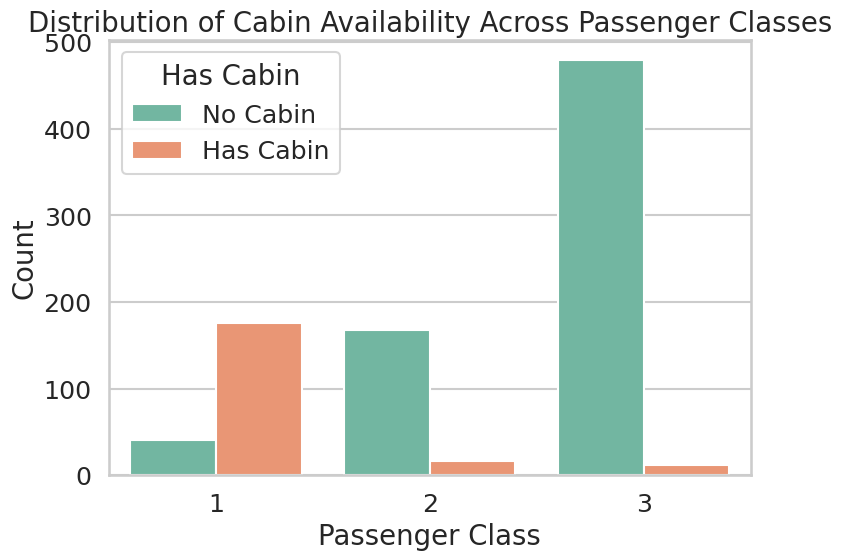

In [13]:
from scipy.stats import chi2_contingency

# Create a contingency table for has_cabin and Pclass
contingency = pd.crosstab(titanic['Pclass'], titanic['has_cabin'])
print("Contingency Table:")
print(contingency)

# Perform Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.3f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.3e}")

# Interpret the results:
if p < 0.05:
    print("\nThere is significant evidence that 'Pclass' and 'has_cabin' are dependent.")
else:
    print("\nThere is no significant evidence that 'Pclass' and 'has_cabin' are dependent.")

# Visualize the distribution using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='has_cabin', data=titanic, palette="Set2")
plt.title("Distribution of Cabin Availability Across Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Has Cabin", labels=["No Cabin", "Has Cabin"])
plt.tight_layout()
plt.show()

Contingency Table:
has_cabin    0    1
Pclass             
1           40  176
2          168   16
3          479   12

Chi-Square Test Results:
Chi2 Statistic: 557.310
Degrees of Freedom: 2
P-value: 9.585e-122

There is significant evidence that 'Pclass' and 'has_cabin' are dependent.

Contingency Table (Percentages):
has_cabin      0      1
Pclass                 
1          18.52  81.48
2          91.30   8.70
3          97.56   2.44


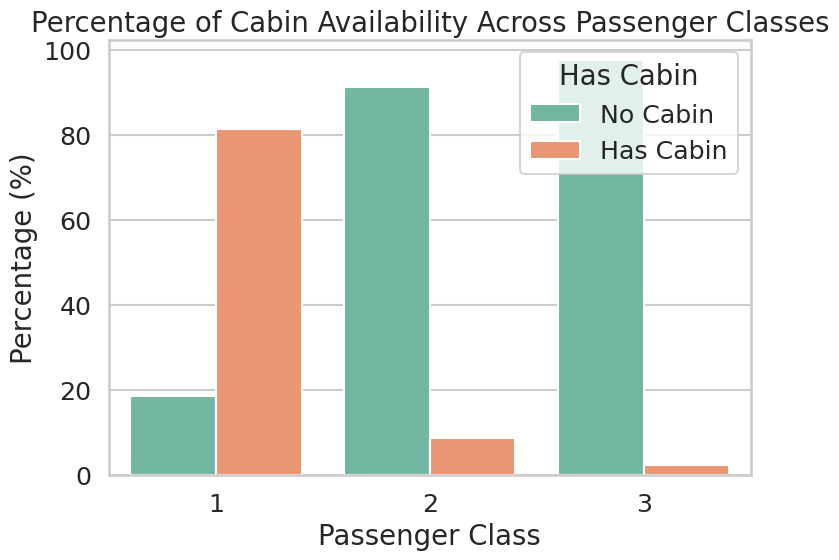

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create a contingency table for has_cabin and Pclass
contingency = pd.crosstab(titanic['Pclass'], titanic['has_cabin'])
print("Contingency Table:")
print(contingency)

# Perform Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.3f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.3e}")

if p < 0.05:
    print("\nThere is significant evidence that 'Pclass' and 'has_cabin' are dependent.")
else:
    print("\nThere is no significant evidence that 'Pclass' and 'has_cabin' are dependent.")

# Convert raw counts to percentages for each Pclass
# Compute percentages for each row of the contingency table
contingency_percent = contingency.div(contingency.sum(axis=1), axis=0) * 100
print("\nContingency Table (Percentages):")
print(contingency_percent.round(2))

# Reset index for plotting purposes
plot_df = contingency_percent.reset_index().melt(id_vars='Pclass',
                                                 value_vars=contingency_percent.columns,
                                                 var_name='has_cabin',
                                                 value_name='Percentage')

# Replace binary values with descriptive labels for plotting
plot_df['has_cabin'] = plot_df['has_cabin'].replace({0: 'No Cabin', 1: 'Has Cabin'})

# Visualize the percentage distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Percentage', hue='has_cabin', data=plot_df, palette="Set2")
plt.title("Percentage of Cabin Availability Across Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Percentage (%)")
plt.legend(title="Has Cabin")
plt.tight_layout()
plt.show()


# Pairwise Dependency Analysis of Titanic Categorical Variables

## Approach

In this analysis, we examine the relationships among four key categorical variables from the Titanic dataset:

- **survived**: Indicates whether the passenger survived (0 = did not survive, 1 = survived)
- **sex**: Passenger's gender
- **has_cabin**: Indicates whether cabin information is available (0 = missing, 1 = present)
- **pclass**: Passenger class (1, 2, or 3)

We use a two-step approach to measure dependency:

1. **Contingency Table & Chi-square Test**:  
   For each pair of variables, we create a contingency table and perform a chi-square test of independence. A p-value less than 0.05 suggests a statistically significant association, implying the variables are dependent.

2. **Cramer's V Calculation**:  
   To quantify the strength of the association, we calculate Cramer's V. This metric ranges from 0 (no association) to 1 (perfect association). We interpret the values as follows:  
   - **Weak Association**: Cramer's V < 0.3  
   - **Moderate Association**: 0.3 ≤ Cramer's V < 0.7  
   - **Strong Association**: Cramer's V ≥ 0.7


The code below loops through every pair of the selected variables, calculates Cramer's V and the p-value, and then dynamically prints a detailed interpretation of the results.


In [15]:
import itertools

# Select variables of interest: 'survived', 'sex', 'has_cabin', 'pclass'
vars_of_interest = ['Survived', 'Sex', 'has_cabin', 'Pclass']
df_analysis = titanic[vars_of_interest].copy()

def cramers_v(x, y):
    """
    Calculate Cramer's V statistic for association between two categorical variables.
    Also returns the chi-square test p-value.
    """
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    if n == 0 or min_dim == 0:
        return np.nan, p
    else:
        cv = np.sqrt(chi2 / (n * min_dim))
        return cv, p

# Calculate pairwise Cramer's V and p-values for each combination
results = []
for var1, var2 in itertools.combinations(vars_of_interest, 2):
    cv, p_value = cramers_v(df_analysis[var1], df_analysis[var2])
    # Determine strength level based on absolute value of correlation
    if abs(cv) < 0.3:
        strength = "weak"
    elif abs(cv) < 0.7:
        strength = "moderate"
    else:
        strength = "strong"

    # Build dynamic interpretation
    if p_value < 0.05:
        significance = "yes"
    else:
        significance = "no"

    results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Cramer\'s V': round(cv, 3),
        'p-value': p_value,
        'Strength': strength,
        'Stat. Significance': significance
    })

results_df = pd.DataFrame(results)
print("Pairwise Dependency Analysis:")
display(results_df[['Variable 1', 'Variable 2', "Cramer's V", 'p-value', 'Strength', 'Stat. Significance']])

Pairwise Dependency Analysis:


,Variable 1,Variable 2,Cramer's V,p-value,Strength,Stat. Significance
0,Survived,Sex,0.541,1.197357e-58,moderate,yes
1,Survived,has_cabin,0.314,6.741970e-21,moderate,yes
2,Survived,Pclass,0.340,4.549252e-23,moderate,yes
3,Sex,has_cabin,0.138,4.005447e-05,weak,yes
4,Sex,Pclass,0.138,2.063886e-04,weak,yes
5,has_cabin,Pclass,0.791,9.585484e-122,strong,yes


In [16]:
# Filter only moderate/strong AND stat. significant pairs
filtered_df = results_df[
    ((results_df['Strength'] == 'moderate') | (results_df['Strength'] == 'strong')) &
    (results_df['Stat. Significance'] == 'yes')
]

if not filtered_df.empty:
    print("\n=== Moderate or Strong Significant Dependencies ===")
    for _, row in filtered_df.iterrows():
        var1, var2 = row['Variable 1'], row['Variable 2']
        cv_value = row["Cramer's V"]
        p_val = row['p-value']
        strength = row['Strength']
        print(f"• {var1} vs. {var2}: Cramer's V={cv_value}, {strength} association, p={p_val:.3e} < 0.05")
else:
    print("\nNo variable pairs have moderate or strong AND statistically significant dependencies.")


=== Moderate or Strong Significant Dependencies ===
• Survived vs. Sex: Cramer's V=0.541, moderate association, p=1.197e-58 < 0.05
• Survived vs. has_cabin: Cramer's V=0.314, moderate association, p=6.742e-21 < 0.05
• Survived vs. Pclass: Cramer's V=0.34, moderate association, p=4.549e-23 < 0.05
• has_cabin vs. Pclass: Cramer's V=0.791, strong association, p=9.585e-122 < 0.05


=======================

# Step 7: Analyze Cabin Missingness by Sex

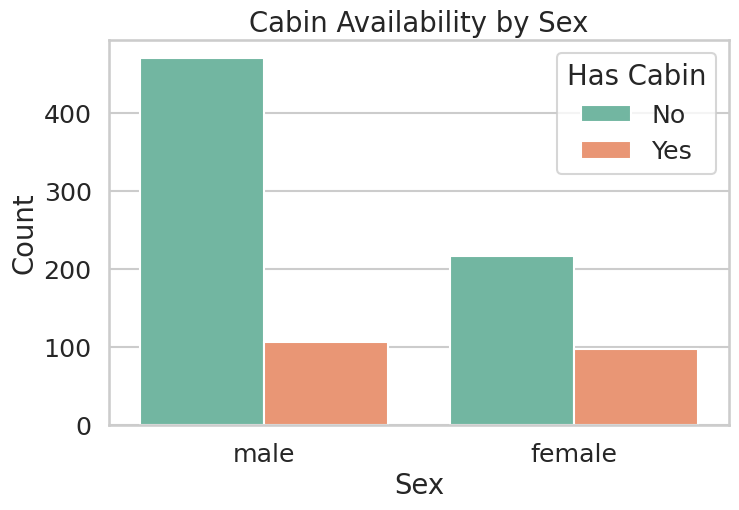

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='has_cabin', data=titanic, palette="Set2")
plt.title("Cabin Availability by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Has Cabin", labels=["No", "Yes"])
plt.show()

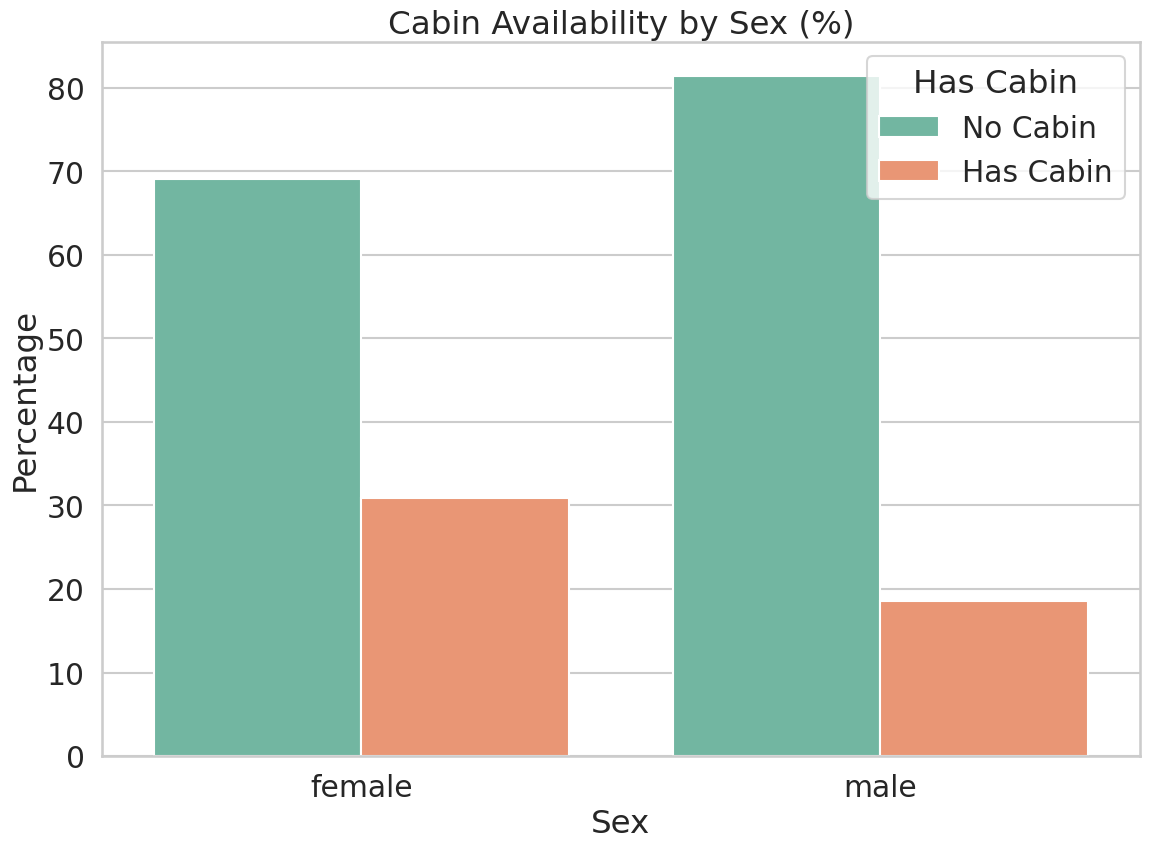

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Group by 'Sex' and 'has_cabin' and get the count
df_counts = (
    titanic
    .groupby(['Sex', 'has_cabin'])
    .size()
    .reset_index(name='Count')
)

# 2) Compute percentage of 'Count' within each 'Sex' group
df_counts['Percent'] = (
    df_counts.groupby('Sex')['Count']
    .transform(lambda x: x / x.sum() * 100)
)

# 3) Create the bar plot
plt.figure(figsize=(12, 9), dpi=100)
ax = sns.barplot(
    data=df_counts,
    x='Sex',
    y='Percent',
    hue='has_cabin',
    palette="Set2"
)

# 4) Manually redefine legend labels (0 -> "No Cabin", 1 -> "Has Cabin")
handles, labels = ax.get_legend_handles_labels()
# Convert "0"/"1" to "No Cabin"/"Has Cabin"
new_labels = ["No Cabin" if label == "0" else "Has Cabin" for label in labels]

plt.legend(handles, new_labels, title="Has Cabin")

# 5) Final touches
plt.title("Cabin Availability by Sex (%)")
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()
